<a href="https://colab.research.google.com/github/noora20FH/PCVK/blob/main/leaf_classification_PCVK_finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noora Aulia Hidayat

TI-3I

2041720046

https://github.com/noora20FH/PCVK/blob/main/leaf_classification_PCVK_finalProject.ipynb 

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.morphology import closing
from skimage.measure import label, regionprops, regionprops_table
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os

#Feature Extraction 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


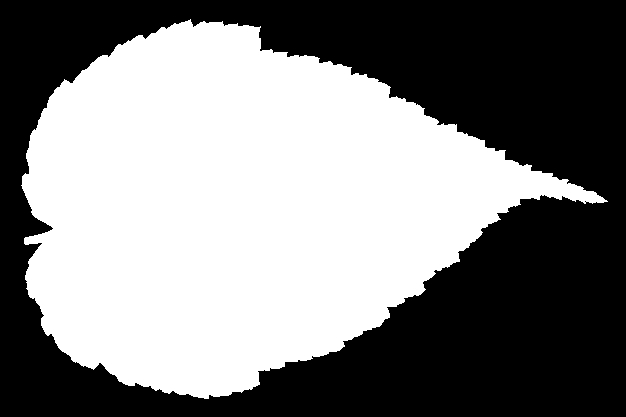

In [7]:
from google.colab import drive
from PIL import Image
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the directory path in Google Drive where your images are located
directory_path = '/content/drive/MyDrive/Leaf_Images'

# Get the filenames of the leaves under the directory
image_path_list = os.listdir(directory_path)

# Looking at the first image
i = 0
image_path = os.path.join(directory_path, image_path_list[i])

# Load the image
image = Image.open(image_path).convert('L')  # Convert to grayscale

# Display the image
image.show()


In [69]:
from skimage.measure import label

df = pd.DataFrame()
image_extensions = ('.jpg', '.jpeg', '.png')  # Add more extensions if needed

for image_filename in image_path_list:
    if image_filename.lower().endswith(image_extensions):
        image_path = os.path.join(directory_path, image_filename)
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image_array = np.array(image)

        binary = image_array < threshold_otsu(image_array)
        binary = closing(binary)

        label_img = label(binary)
        table = pd.DataFrame(regionprops_table(label_img, image_array,
                                               ['convex_area', 'area',
                                                'eccentricity', 'extent',
                                                'inertia_tensor',
                                                'major_axis_length',
                                                'minor_axis_length']))
        table['convex_ratio'] = table['area'] / table['convex_area']
        real_images = []
        std = []
        mean = []
        percent25 = []
        percent75 = []
        for prop in regionprops(label_img):
            min_row, min_col, max_row, max_col = prop.bbox
            img = image_array[min_row:max_row, min_col:max_col]
            real_images += [img]
            mean += [np.mean(img)]
            std += [np.std(img)]
            percent25 += [np.percentile(img, 25)]
            percent75 += [np.percentile(img, 75)]

        table['real_images'] = real_images
        table['mean_intensity'] = mean
        table['std_intensity'] = std
        table['25th Percentile'] = percent25
        table['75th Percentile'] = percent75
        table['iqr'] = table['75th Percentile'] - table['25th Percentile']
        table['label'] = image_filename[5]  # Adjust the indexing based on your filenames
        df = df.append(table, ignore_index=True)

df


<ipython-input-69-21e8bb8e96c9>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table, ignore_index=True)
<ipython-input-69-21e8bb8e96c9>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table, ignore_index=True)
<ipython-input-69-21e8bb8e96c9>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table, ignore_index=True)
<ipython-input-69-21e8bb8e96c9>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(table, ignore_index=True)
<ipython-input-69-21e8bb8e96c9>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

,convex_area,area,eccentricity,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-1-0,inertia_tensor-1-1,major_axis_length,minor_axis_length,convex_ratio,real_images,mean_intensity,std_intensity,25th Percentile,75th Percentile,iqr,label
0,261042,129874,0.690301,0.497521,40422.387954,-677.748756,-677.748756,21196.850460,804.450130,582.037631,0.497521,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",128.167203,127.496472,0.0,255.0,255.0,j
1,299292,172634,0.514246,0.576808,40712.576609,-173.784812,-173.784812,29951.060714,807.122120,692.222566,0.576808,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",108.030859,126.002088,0.0,255.0,255.0,p
2,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,[[0]],0.000000,0.000000,0.0,0.0,0.0,p
3,1,1,0.000000,1.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,1.000000,[[0]],0.000000,0.000000,0.0,0.0,0.0,p
4,244587,113411,0.738901,0.463684,43205.728847,197.231698,197.231698,19618.888130,831.455379,560.246217,0.463684,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",136.806515,127.158053,0.0,255.0,255.0,p
5,311650,179807,0.431484,0.576952,38854.078236,461.571678,461.571678,31673.890880,788.757284,711.554251,0.576952,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",107.952023,125.989907,0.0,255.0,255.0,p
6,557745,242169,0.874973,0.434193,149728.008763,3915.877580,3915.877580,35264.848261,1548.479604,749.731038,0.434193,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",144.425842,126.370029,0.0,255.0,255.0,p
7,607860,290225,0.908960,0.477454,184146.474187,1810.752240,1810.752240,32028.547674,1716.592092,715.619969,0.477454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",133.407421,127.361337,0.0,255.0,255.0,p
8,614068,293137,0.913075,0.477369,182945.871149,4994.138788,4994.138788,30613.684539,1711.651488,697.998621,0.477369,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",133.428786,127.360627,0.0,255.0,255.0,p
9,577830,287394,0.883858,0.497368,154884.152851,3998.907135,3998.907135,34049.076229,1574.884619,736.661456,0.497368,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",128.417593,127.495074,0.0,255.0,255.0,j


/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


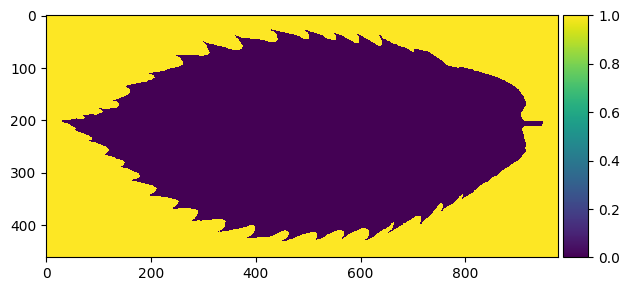

In [35]:
# label_img = label(binary)
# imshow(label_img)

#Machine Learning Implementation

In [68]:
X = df.copy()
X['image'] = image_path_list

X = X.drop(columns=['label', 'real_images'])

# Features
X = X[['iqr', '75th Percentile', 'inertia_tensor-1-1', 'std_intensity', 'mean_intensity',
       '25th Percentile', 'minor_axis_length', 'solidity', 'eccentricity']]

# Target
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=123, stratify=y)

clf = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=123)
clf.fit(X_train, y_train)

# Print confusion matrix of test set
print(classification_report(clf.predict(X_test), y_test))

# Print accuracy score of the test set
print(f"Test Accuracy: {np.mean(clf.predict(X_test) == y_test) * 100:.2f}%")


ValueError: ignored

###try other ways

In [20]:
from google.colab import drive
import os
import csv


# Path to the CSV file containing image labels
csv_file_path = '/content/drive/MyDrive/label.csv'

# Create an empty dictionary to store the mapping between filenames and labels
label_mapping = {}

# Read the CSV file and populate the label_mapping dictionary
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        if len(row) == 2:
            filename = row[0].strip()
            label = row[1].strip()
            label_mapping[filename] = label

# Set the directory path where your images are located
directory_path = '/content/drive/MyDrive/Leaf_Images'

# Create an empty list to store the labels
labels = []

# Get the filenames of the leaves under the directory
image_path_list = os.listdir(directory_path)

# Loop through each image
for image_filename in image_path_list:
    # Construct the full image path
    image_path = os.path.join(directory_path, image_filename)
    
    # Check if the image filename exists in the label_mapping dictionary
    if image_filename in label_mapping:
        # Assign the corresponding label to the image
        label = label_mapping[image_filename]
    else:
        # If the filename is not found in the label_mapping dictionary, assign a default label
        label = 'unknown'
    
    # Append the label to the list
    labels.append(label)

# Print the labels
print(labels)


['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown']


In [47]:
image_path_list = os.listdir(directory_path)
df = pd.DataFrame()
for i in range(len(image_path_list)):
   
  # Path to the CSV file containing image labels
  csv_file_path = '/content/drive/MyDrive/label.csv'

  # Create an empty dictionary to store the mapping between filenames and labels
  label_mapping = {}

# Read the CSV file and populate the label_mapping dictionary
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
        if len(row) == 2:
            filename = row[0].strip()
            label = row[1].strip()
            label_mapping[filename] = label

# Set the directory path where your images are located
directory_path = '/content/drive/MyDrive/Leaf_Images'

# Create an empty list to store the labels
labels = []

# Get the filenames of the leaves under the directory
image_path_list = os.listdir(directory_path)

# Loop through each image
for image_filename in image_path_list:
    # Construct the full image path
    image_path = os.path.join(directory_path, image_filename)
    
    # Check if the image filename exists in the label_mapping dictionary
    if image_filename in label_mapping:
        # Assign the corresponding label to the image
        label = label_mapping[image_filename]
    else:
        # If the filename is not found in the label_mapping dictionary, assign a default label
        label = 'unknown'
    
    # Append the label to the list
    labels.append(label)

  
table = pd.DataFrame(regionprops_table(label, image_array['convex_area', 'area', 'eccentricity',
                           'extent', 'inertia_tensor',                         
                           'major_axis_length', 'minor_axis_length',
                           'perimeter', 'solidity', 'image',
                           'orientation', 'moments_central',
                           'moments_hu', 'euler_number',
                           'equivalent_diameter',
                           'mean_intensity', 'bbox']))
table['perimeter_area_ratio'] = table['perimeter']/table['area']
real_images = []
std = []
mean = []
percent25 = []
percent75 = []
for prop in regionprops(label): 
      
      min_row, min_col, max_row, max_col = prop.bbox
      img = image[min_row:max_row,min_col:max_col]
      real_images += [img]
      mean += [np.mean(img)]
      std += [np.std(img)]
      percent25 += [np.percentile(img, 25)] 
      percent75 += [np.percentile(img, 75)]
table['real_images'] = real_images
table['mean_intensity'] = mean
table['std_intensity'] = std
table['25th Percentile'] = mean
table['75th Percentile'] = std
table['iqr'] = table['75th Percentile'] - table['25th Percentile']
table['label'] = image_path[5]
df = pd.concat([df, table], axis=0)
df.head()

IndexError: ignored

In [30]:
git clone https://github.com/adl1995/leaf-classification.git
cd leaf-classification
pip install -r requirements.txt
python learn.py

SyntaxError: ignored